<a href="https://colab.research.google.com/github/ShrutiJain456/compute/blob/main/Copy_of_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression
Implementing Linear Regression for predicting profit of a food truck given the population and profits of different cities


In [45]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error


In [46]:
#in dataset both the column has values in multiple of 10k

### Reading the dataset

In [47]:
#load the dataset
path = '/content/Data1.txt'
df = pd.read_csv(path)
df

,6.1101,17.592
0,5.5277,9.13020
1,8.5186,13.66200
2,7.0032,11.85400
3,5.8598,6.82330
4,8.3829,11.88600
...,...,...
91,5.8707,7.20290
92,5.3054,1.98690
93,8.2934,0.14454
94,13.3940,9.05510


In [48]:
df.columns = ['population', 'profit']
df.loc['96'] = [6.1101, 17.592]
df.shape

(97, 2)

In [49]:
#describe the dataframe
df.describe()

,population,profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


### Scatter plot of Population vs Profit

In [50]:
#plot

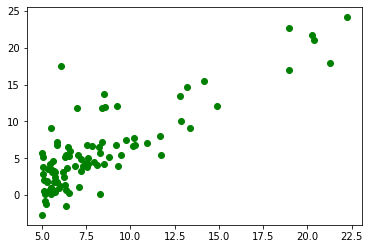

In [51]:
plt.scatter(df['population'], df['profit'], c= 'g')
plt.show()

### Function to compute the cost function 

In [52]:
### Function to compute the cost function 

In [53]:
def computeCost(X, y, theta):
    inner_product = np.power(((X * theta.T) - y) , 2)
    return np.sum(inner_product) / (2 * len(X))

### Appending 1s to the front of the dataset

In [54]:
#insert column with 1s
df.insert(0,'ones',1)

In [55]:
df

,ones,population,profit
0,1,5.5277,9.13020
1,1,8.5186,13.66200
2,1,7.0032,11.85400
3,1,5.8598,6.82330
4,1,8.3829,11.88600
...,...,...,...
92,1,5.3054,1.98690
93,1,8.2934,0.14454
94,1,13.3940,9.05510
95,1,5.4369,0.61705


### Set training data (X) and target variable (y)

In [56]:
col = df.shape[1]
X = df.iloc[:, :-1]
y = df.iloc[:, col-1:col]
X.head()

,ones,population
0,1,5.5277
1,1,8.5186
2,1,7.0032
3,1,5.8598
4,1,8.3829


In [57]:
y.head()

,profit
0,9.1302
1,13.6620
2,11.8540
3,6.8233
4,11.8860


### Converting dataframe to numpy matrices and creating a parameter (theta) matrix

In [58]:
#converting X,y into numpy matrix
X = np.matrix(X)
y = np.matrix(y)

In [59]:
#converting theta into numpy matrix
# take initial values as [0,0] for theta
theta = np.matrix(np.array([0,0]))
theta

matrix([[0, 0]])

### Function to perform gradient descent on parameters theta by repeatedly updating the parameters

In [64]:
def gradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    
    # With each iteration, we are calculating the changes to be made to the
    # parameter (theta) value to reduce the error (cost)
    # number of parameters to be calculated,here we have 2 parameters theta [0,0] and theta [0,1]
    for i in range(iters):
        error = (X * theta.T) - y
        
        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))
            
        theta = temp
        cost[i] = computeCost(X, y, theta)
        
        
        
    return theta, cost

### Set values for learning rate and number of iterations
- alpha here denotes the learning rate that helps to determine how quickly the algorithm
    will converge to the optimal solution
- iters denotes the number of iterations

In [65]:
# take alpha 0.01 
# iters=1000
alpha = 0.01
iters = 1000
g, cost = gradientDescent(X, y, theta, alpha, iters)
print(g)
cost[:50]
computeCost(X,y,g)

[[-3.24140214  1.1272942 ]]


4.515955503078913




### Using Matplotlib library to visualize our solution using scatter plot

Text(0.5, 1.0, 'Predicted Profit vs. Population Size')

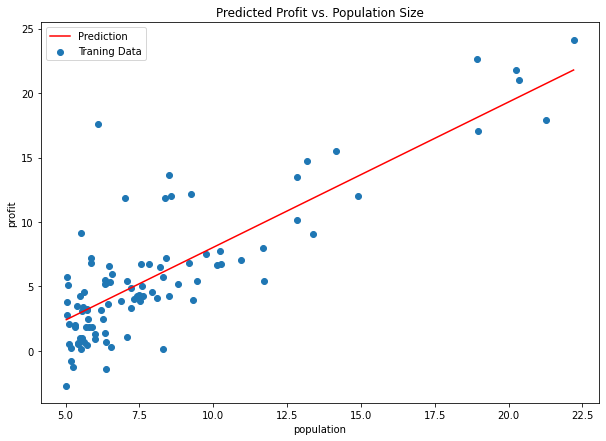

In [68]:
# linspace function will create an evenly-spaced series of points within the range of our data
x = np.linspace(df.population.min(), df.population.max(), 100)  
f = g[0, 0] + (g[0, 1] * x)

fig, ax = plt.subplots(figsize=(10, 7))  
ax.plot(x, f, 'r', label='Prediction')  
ax.scatter(df.population, df.profit, label='Traning Data')  
ax.legend(loc=2)  
ax.set_xlabel('population')  
ax.set_ylabel('profit')  
ax.set_title('Predicted Profit vs. Population Size')


Text(0.5, 1.0, 'Error vs Training epoch')

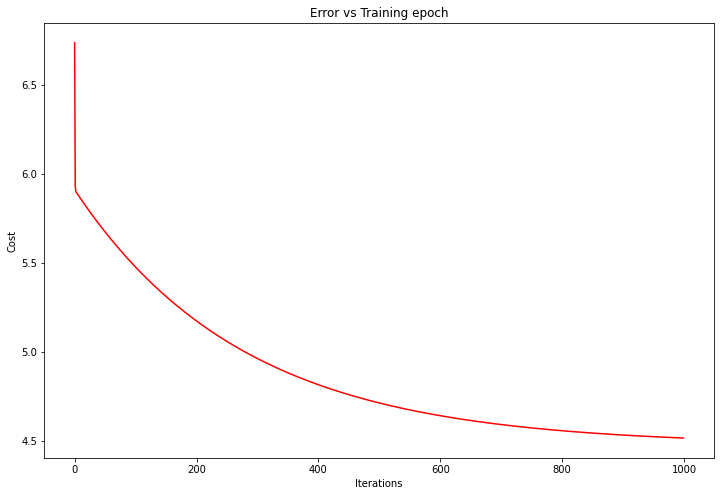

In [69]:
fig, ax = plt.subplots(figsize = (12, 8))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs Training epoch')

SCIKIT LEARN IMPLEMENTATION

-Implement various type of errors,
 eg.Mean squared error,R_squared_score
choose best for the evaluting model,
and justify why it is best


In [70]:
#fit the model
lin_model = LinearRegression().fit(X,y)
lin_model

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


LinearRegression()

In [89]:
lin_model.coef_.reshape(2,1)
lin_model.coef_.shape

(1, 2)

In [81]:
lin_model.intercept_

array([-3.89578088])

In [84]:
X.shape

(97, 2)

In [85]:
lin_model.intercept_.shape

(1,)

In [88]:
lin_model.coef_.shape

(1, 2)

In [96]:
#predict the target values
y = lin_model.intercept_ + X.dot(lin_model.coef_.ravel())

In [99]:
lin_model.predict(df[['population','profit']])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([[ 6.99685490e+00],
       [ 1.24034448e+01],
       [ 1.02464399e+01],
       [ 4.24464559e+00],
       [ 1.02846170e+01],
       [ 1.29188732e+00],
       [ 1.04206229e+01],
       [ 3.97669023e+00],
       [ 6.57551328e-01],
       [-1.57968607e-02],
       [ 1.46022058e+01],
       [-1.31640428e-01],
       [ 4.72484163e+00],
       [-3.04135404e+00],
       [ 2.95227010e-01],
       [ 2.43302400e+00],
       [-3.22676340e+00],
       [ 4.60939384e-01],
       [ 2.53383534e+00],
       [-1.51325483e-01],
       [ 2.20729825e+01],
       [ 1.19012155e+00],
       [ 2.29308115e+00],
       [-2.18254670e-01],
       [ 2.31121148e+01],
       [ 1.22113664e+01],
       [ 4.51116930e+00],
       [ 1.36322694e+01],
       [ 2.49124025e+01],
       [-5.35128192e+00],
       [ 3.25836467e+00],
       [ 1.05804894e+01],
       [-1.68926515e+00],
       [ 3.90976104e+00],
       [ 1.54719652e+00],
       [ 1.01522281e+00],
       [ 1.51943670e-01],
       [ 8.17414050e+00],
       [ 2.6

In [101]:
#evalute the model
r2_score(y_true = df.profit, y_pred = lin_model.predict(df[['population','profit']]))

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


0.7076522430535845

In [103]:
mean_squared_error(y_true = df.profit, y_pred = lin_model.predict(df[['population','profit']]))

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


8.785041210246003

In [ ]:
#value pf R_square determines the model efficiency and how aptly the model is fit.
#Here, 0.70765 denotes that almost 70.765 percent of the values predicted by the model are close to actual values.
#the value here denotes a good prediction
#r2score is considered instead of mean squared error as its value ranges from 0 to 1 which can lead to a better evaluation as compared to the latter where the value can rise rise much higher 